In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
file_path = '/ocean/cdonaldson/MOAD/analysis-cassidy/scrubber_data/'

# Read file using gpd.read_file()
gdf = gpd.read_file('{}{}'.format(file_path, 'SalishSea_July172019.shp'))
data = gpd.read_file('{}{}'.format(file_path, 'SalishSea_July172019.dbf'))
data_csv = pd.read_csv('{}{}'.format(file_path, 'MEIT_2019_All_Scrubber_Data_SalishSeaAtlantisModel_Areas_2022-04-12.csv'))

In [3]:
data_csv['date_time_conv'] = pd.to_datetime(data_csv['date_time'])
data_sorted = data_csv.sort_values(by='date_time_conv')
data_sorted = data_sorted[['date_time_conv', 'lat', 'long', 'ww_tonnes']].set_index('date_time_conv')
data_sorted['monthday'] = data_sorted.index.strftime('%m-%d')

In [4]:
data_sorted.head(40)

,lat,long,ww_tonnes,monthday
date_time_conv,,,,
2019-01-01 00:09:27,49.023890,-123.150986,17.046220,01-01
2019-01-01 00:09:27,49.016220,-123.144248,16.958303,01-01
2019-01-01 00:09:27,49.008548,-123.137511,19.523166,01-01
2019-01-01 00:09:27,48.998318,-123.137511,16.758534,01-01
2019-01-01 00:09:27,48.990644,-123.130773,16.736404,01-01
2019-01-01 00:09:27,48.982968,-123.124036,9.662780,01-01
2019-01-01 00:32:37,48.926646,-123.097087,48.979840,01-01
2019-01-01 00:32:37,48.862567,-123.063400,18.836108,01-01
2019-01-01 00:32:37,48.875390,-123.070137,49.572707,01-01


In [5]:
data_sorted.max()

lat           50.467284
long        -122.921915
ww_tonnes    3132.95178
monthday          12-31
dtype: object

<Axes: >

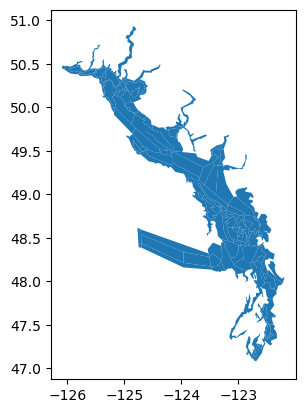

In [6]:
gdf.plot()

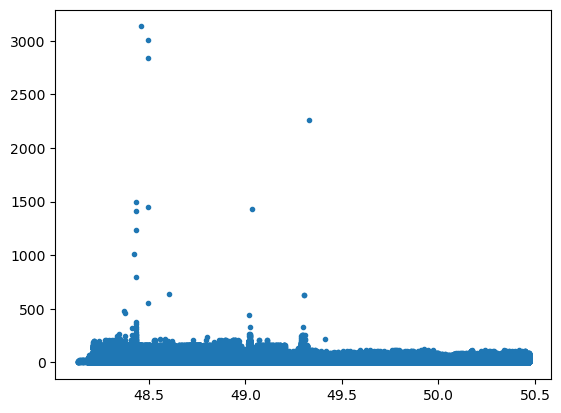

In [7]:
plt.plot(data_sorted['lat'], data_sorted['ww_tonnes'], '.')

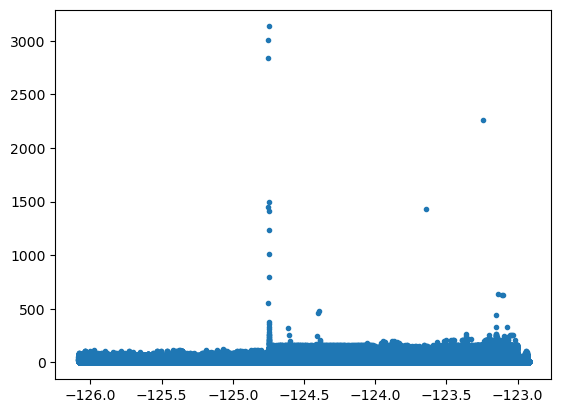

In [8]:
plt.plot(data_sorted['long'], data_sorted['ww_tonnes'], '.')

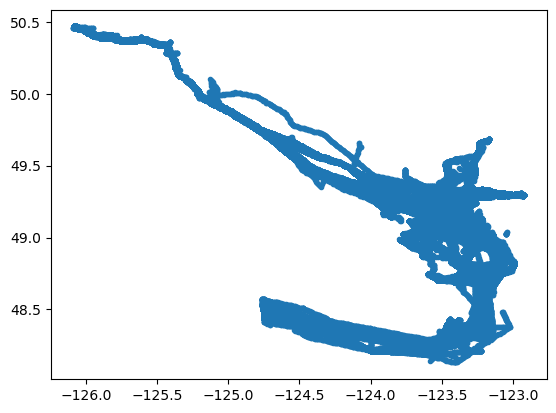

In [9]:
plt.plot(data_sorted['long'], data_sorted['lat'], '.')

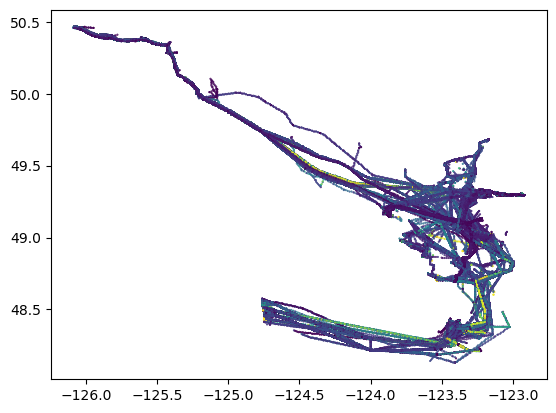

In [10]:
plt.scatter(data_sorted['long'], data_sorted['lat'], c=data_sorted['ww_tonnes'], s=0.25, vmin=0, vmax=75)

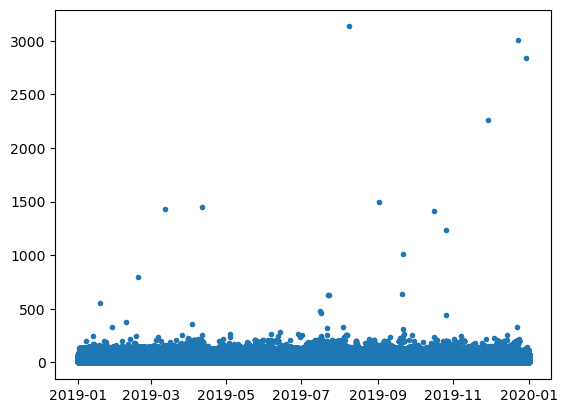

In [11]:
plt.plot(data_sorted.index, data_sorted['ww_tonnes'], '.')

(array([2.231975e+06, 5.461400e+04, 1.396000e+03, 2.700000e+01,
        7.000000e+00, 2.000000e+00, 1.000000e+00, 3.000000e+00,
        1.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 3.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 1.000000e+00, 1.000000e+00]),
 array([   0.        ,   78.3237945 ,  156.647589  ,  234.97138349,
         313.29517799,  391.61897249,  469.94276699,  548.26656148,
         626.59035598,  704.91415048,  783.23794498,  861.56173947,
         939.88553397, 1018.20932847, 1096.53312297, 1174.85691746,
        1253.18071196, 1331.50450646, 1409.82830096, 1488.15209545,
        1566.47588

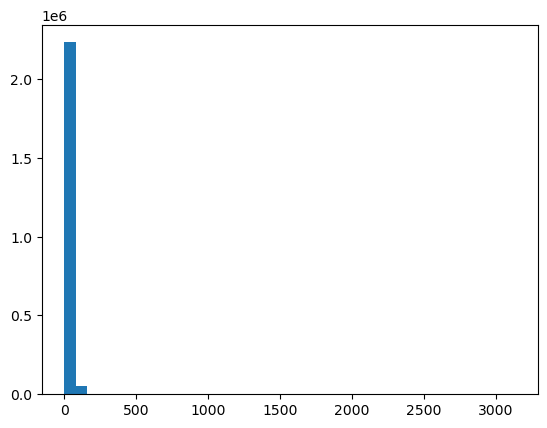

In [12]:
plt.hist(data_sorted['ww_tonnes'], bins=40)

In [13]:
len(data_sorted)

2288037

## Trying KDTree solution

In [14]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = 1 - mesh.tmask[0]

In [15]:
from scipy.spatial import cKDTree
import pyproj

In [16]:
lat_grid = mesh['nav_lat'].values
lon_grid = mesh['nav_lon'].values

In [17]:
lat_flat = lat_grid.ravel()
lon_flat = lon_grid.ravel()

In [18]:
proj = pyproj.Proj(proj='aea', lat_1=lat_flat.mean(), lat_2=lat_flat.mean(),
                   lat_0=lat_flat.mean(), lon_0=lon_flat.mean())

In [19]:
gx, gy = proj(lon_flat, lat_flat)
grid_points = np.column_stack((gx, gy))

In [20]:
tree = cKDTree(grid_points)

In [21]:
ox, oy = proj(data_sorted['long'].values, data_sorted['lat'].values)

In [22]:
dist, idx = tree.query(np.column_stack((ox, oy)), k=1)

In [23]:
Xdim = mesh.dims['x']
Ydim = mesh.dims['y']

In [24]:
data_sorted['x_idx'] = idx % Xdim
data_sorted['y_idx'] = idx // Xdim

In [49]:
data_sorted.head(30)

,lat,long,ww_tonnes,monthday,x_idx,y_idx
time,,,,,,
2019-01-01 00:09:27,49.023890,-123.150986,17.046220,01-01,305,401
2019-01-01 00:09:27,49.016220,-123.144248,16.958303,01-01,305,399
2019-01-01 00:09:27,49.008548,-123.137511,19.523166,01-01,305,397
2019-01-01 00:09:27,48.998318,-123.137511,16.758534,01-01,303,395
2019-01-01 00:09:27,48.990644,-123.130773,16.736404,01-01,303,393
2019-01-01 00:09:27,48.982968,-123.124036,9.662780,01-01,304,391
2019-01-01 00:32:37,48.926646,-123.097087,48.979840,01-01,300,378
2019-01-01 00:32:37,48.862567,-123.063400,18.836108,01-01,297,364
2019-01-01 00:32:37,48.875390,-123.070137,49.572707,01-01,298,367


In [26]:
times = np.sort(data_sorted.index.unique())

In [53]:
times[0:24]

array(['2019-01-01T00:09:27.000000000', '2019-01-01T00:32:37.000000000',
       '2019-01-01T00:53:16.000000000', '2019-01-01T01:00:00.000000000',
       '2019-01-01T01:02:04.000000000', '2019-01-01T01:02:38.000000000',
       '2019-01-01T01:10:00.000000000', '2019-01-01T01:24:00.000000000',
       '2019-01-01T01:38:33.000000000', '2019-01-01T01:53:57.000000000',
       '2019-01-01T02:00:00.000000000', '2019-01-01T02:05:24.000000000',
       '2019-01-01T02:05:34.000000000', '2019-01-01T02:15:30.000000000',
       '2019-01-01T02:16:42.000000000', '2019-01-01T02:17:53.000000000',
       '2019-01-01T02:26:30.000000000', '2019-01-01T02:44:02.000000000',
       '2019-01-01T02:47:30.000000000', '2019-01-01T02:48:51.000000000',
       '2019-01-01T02:57:27.000000000', '2019-01-01T03:00:00.000000000',
       '2019-01-01T03:07:55.000000000', '2019-01-01T03:20:38.000000000'],
      dtype='datetime64[ns]')

In [27]:
t_map = {t: i for i, t in enumerate(times)}
t_idx = data_sorted.index.map(t_map).to_numpy()

In [28]:
x_vals = mesh['x'].values
y_vals = mesh['y'].values

nx = len(x_vals)
ny = len(y_vals)
nt = len(times)

In [29]:
data_sorted = data_sorted.copy()
data_sorted.index.name = "time"

In [30]:
data_sorted.index

DatetimeIndex(['2019-01-01 00:09:27', '2019-01-01 00:09:27',
               '2019-01-01 00:09:27', '2019-01-01 00:09:27',
               '2019-01-01 00:09:27', '2019-01-01 00:09:27',
               '2019-01-01 00:32:37', '2019-01-01 00:32:37',
               '2019-01-01 00:32:37', '2019-01-01 00:32:37',
               ...
               '2019-12-31 23:06:53', '2019-12-31 23:06:53',
               '2019-12-31 23:06:53', '2019-12-31 23:06:53',
               '2019-12-31 23:14:10', '2019-12-31 23:14:10',
               '2019-12-31 23:14:10', '2019-12-31 23:14:10',
               '2019-12-31 23:14:10', '2019-12-31 23:14:10'],
              dtype='datetime64[ns]', name='time', length=2288037, freq=None)

In [31]:
out = xr.Dataset(
    {
        "washwater": ("time", data_sorted['ww_tonnes'].values),
        "grid_x": ("time", data_sorted['x_idx']),
        "grid_y": ("time", data_sorted['y_idx']),
        "lat": ("time", data_sorted['lat'].values),
        "lon": ("time", data_sorted['long'].values),
    },
    coords={"time": data_sorted.index},
)

In [32]:
out

<xarray.Dataset>
Dimensions:    (time: 2288037)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-01T00:09:27 ... 2019-12-31T23:14:10
Data variables:
    washwater  (time) float64 17.05 16.96 19.52 16.76 ... 10.4 6.794 0.0 6.82
    grid_x     (time) int64 305 305 305 303 303 304 ... 236 236 237 237 236 236
    grid_y     (time) int64 401 399 397 395 393 391 ... 427 426 421 419 429 424
    lat        (time) float64 49.02 49.02 49.01 49.0 ... 48.97 48.97 49.0 48.98
    lon        (time) float64 -123.2 -123.1 -123.1 ... -123.6 -123.6 -123.6

In [33]:
## save the nc file with time as the only dimension

# save_loc = '/ocean/cdonaldson/scrubbers/yearly_obs/'
# out.to_netcdf('{}scrubber_obs_20190101_20191231.nc'.format(save_loc))

In [34]:
test_nc = out.sel(time=slice('2019-01-05', '2019-01-05'))
test_nc.head(10)

<xarray.Dataset>
Dimensions:    (time: 10)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-05 2019-01-05 ... 2019-01-05
Data variables:
    washwater  (time) float64 38.0 36.04 0.0 21.58 ... 34.04 36.06 106.8 15.21
    grid_x     (time) int64 349 331 349 335 332 345 331 351 335 280
    grid_y     (time) int64 449 456 448 462 463 454 455 450 459 343
    lat        (time) float64 49.29 49.29 49.29 49.32 ... 49.28 49.3 49.31 48.75
    lon        (time) float64 -123.1 -123.2 -123.1 ... -123.1 -123.2 -123.1

In [35]:
test_1d = data_sorted[data_sorted['monthday'] == '01-05']
test_1d.head(10)

,lat,long,ww_tonnes,monthday,x_idx,y_idx
time,,,,,,
2019-01-05,49.294146,-123.083612,38.000762,01-05,349,449
2019-01-05,49.291603,-123.198147,36.036755,01-05,331,456
2019-01-05,49.291603,-123.076875,0.000000,01-05,349,448
2019-01-05,49.322107,-123.198147,21.582955,01-05,335,462
2019-01-05,49.319566,-123.218359,14.125664,01-05,332,463
2019-01-05,49.306857,-123.117299,36.245762,01-05,345,454
2019-01-05,49.283974,-123.191410,34.039815,01-05,331,455
2019-01-05,49.301773,-123.076875,36.063625,01-05,351,450
2019-01-05,49.309399,-123.191410,106.845215,01-05,335,459


In [36]:
np.any((test_nc['grid_x'] - test_1d['x_idx']).values != 0)

False

In [37]:
np.any((test_nc['grid_y'] - test_1d['y_idx']).values != 0)

False

## Scratch (other matching methods that take longer)

In [38]:
# g = data_sorted.groupby(pd.DatetimeIndex(data_sorted.index.normalize()))

In [39]:
# monthdays = data_sorted['monthday'].unique()

In [40]:
# import functions1

In [41]:
# jjii = xr.open_dataset('~/MEOPAR/grid/grid_from_lat_lon_mask999.nc')
# def grid_from_coord(mylat, mylon):
#     jjii = xr.open_dataset('~/MEOPAR/grid/grid_from_lat_lon_mask999.nc')
#     jj = jjii.jj.sel(lats=mylat, lons=mylon, method='nearest').item()
#     ii = jjii.ii.sel(lats=mylat, lons=mylon, method='nearest').item()
#     jjii.close()
#     return ii, jj

In [42]:
# res2 = grid_from_coord(test_1d['lat'][0:2], test_1d['long'][0:2])

In [43]:
# for i in np.arange(len(test_1d)):
#     functions1.grid_from_latlon(test_1d['lat'][i], test_1d['long'][i])

In [44]:
# for i in np.arange(len(test_1d)):
#     grid_from_coord(test_1d['lat'][i], test_1d['long'][i])

In [45]:
# res = functions1.grid_from_latlon(test_1d['lat'][0], test_1d['long'][0])

In [46]:
# test_1d['xy'] = test_1d.apply(lambda row: functions1.grid_from_latlon(test_1d['lat'], test_1d['long']), axis=1)

In [47]:
# jjii = xr.open_dataset('~/MEOPAR/grid/grid_from_lat_lon_mask999.nc')
# jjii.lons.values

In [48]:
# mesh